# Pendahuluan

Nurul Jannah (personal.nuruljannah@gmail.com)

Berikut Pemodelan untuk Masalah Klasifikasi Akun Bot yang saya susun untuk memenuhi project Data Science UIN Jakarta.

# Mengakses Data

Untuk mengakses dataset dari Google Drive maka pertama-tama kita perlu menghubungkan Google Colaboratory dengan Google Drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Import Modul

 Pada tahap ini akan di import beberapa modul yang akan digunakan.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Dataset

Dataset yang terdapat di google drive selanjutnya di load ke dalam bentuk dataframe agar lebih mudah di proses. Adapun dataset yang digunakan adalah kumpulan informasi terkait suatu akun dikategorikan sebagai akun bot atau bukan. Dataset terdiri dari 2000 akun yang telah diberi label 1 dan 0. Dimana 1 berarti akun merupakan bot dan 0 berarti akun bukan bot. Tujuan pemodelan ini adalah agar mesin dapat membedakan antara akun bot dan bukan akun bot.

In [3]:
file = os.getcwd()

train_data = pd.read_csv(file + '/drive/My Drive/Salinan Bot Twitter.csv')
print("Load dataset...")

Load dataset...


Akan dilihat ukuran serta lima dataset teratas.

In [4]:
print('train_data', train_data.shape)
train_data.head()

train_data (2000, 22)


,ID,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,URL,Deskripsi,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,"1,32E+22",1,0,53,0,25,0,3,1,1,0,0,1,0,0,1,0,1,0.29,33,0,1
1,"1,32E+23",1,0,218,0,52,0,3,1,1,0,0,0,0,0,0,0,1,0.25,0,0,0
2,"1,33E+23",1,0,530,0,123,0,5,1,1,0,0,0,0,0,0,0,1,0.65,0,0,0
3,"1,33E+23",1,1,237,0,18,0,6,1,1,0,0,0,0,0,1,0,1,0.77,0,1,1
4,"1,35E+23",1,0,94,0,31,0,14,1,1,0,1,0,0,0,1,0,1,3700.00,86,1,1


Dari hasil code di atas terlihat bahwa dataset terdiri dari 2000 baris dan 22 kolom. Adapun rincian atau deskripsi dari setiap kolom dapat dilihat pada link berikut: [Deskripsi Bot Twitter].(https://docs.google.com/document/d/1pXzjj19xL3KDEgk_eIDBTwupjOgmeilE/edit?usp=sharing&ouid=105168169430422773514&rtpof=true&sd=true)

# Cek *Missing Value* dan Tipe Data

Pada tahap ini akan diperiksa apakah terdapat *missing value* pada dataset.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2000 non-null   object 
 1   Screen name                         2000 non-null   int64  
 2   Foto Profil                         2000 non-null   int64  
 3   Following                           2000 non-null   int64  
 4   Following kurang 30                 2000 non-null   int64  
 5   Followers                           2000 non-null   int64  
 6   Followers lebih 1000                2000 non-null   int64  
 7   Tweet                               2000 non-null   int64  
 8   Tweet kurang 50                     2000 non-null   int64  
 9   Lokasi                              2000 non-null   int64  
 10  URL                                 2000 non-null   int64  
 11  Deskripsi                           2000 no

Dari hasil diatas terlihat bahwa tidak ada missing value di semua kolom. Selanjutnya kolom yang dianggap tidak penting dan/atau tidak diperlukan dalam pemodelan ini akan dihilangkan. Dalam kasus ini kolom ID akan dihilangkan karena tidak diperlukan.

In [6]:
# menghilangkan kolom yang tidak diperlukan

train_data.drop('ID', axis=1, inplace=True)

Selanjutnya akan dipisahkan atribut dan label/kategori untuk pelatihan model.

In [7]:
# memisahkan atribut dan label

x = train_data[['Screen name', 'Foto Profil', 'Following', 'Following kurang 30', 'Followers', 'Followers lebih 1000', 'Tweet', 'Tweet kurang 50', 'Lokasi', 'URL', 'Deskripsi', 'Follower Ratio 2:1', 'Follower Ratio 50:1', 'Follower Ratio 100:1', 'Pola Aktivitas Akun', 'Usia Akun (bulan)', 'Usia Akun kurang sama dengan 12', 'Rataan Tweet per Minggu', 'Retweet Ratio %', 'Retweet Ratio lebih sama dengan 60']]
y = train_data['Kategori']

# Split Dataset

Dataset dibagi menjadi data training dan data testing dengan rasio 80% untuk data training dan 20% untuk data testing.

((1600, 20), (400, 20), (1600,), (400,))

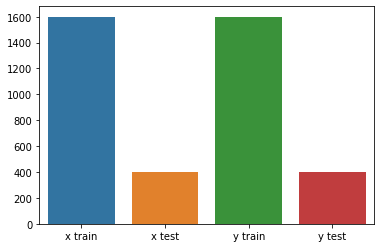

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

sns.barplot(x=['x train', 'x test', 'y train', 'y test'], y=[len(x_train), len(x_test), len(y_train), len(y_test)])
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Model Random Forest

Kemudian akan dibuat model Random Forest yang selanjutnya akan dilatih dengan menggunakan fungsi fit().

In [9]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Terlihat dibawah ini model Random Forest berhasil memprediksi akun bot atau bukan akun bot dengan akurasi sebesar ~90%.

In [12]:
prediksi = rf_model.predict(x_test)
print(accuracy_score(y_test, prediksi))

0.9


Dibawah ini model akan dicoba untuk memprediksi sebuah akun dengan memasukkan nilai atribut yang sesuai dengan format secara berurutan.
Adapun rincian atribut akun tersebut sebagai berikut:
1. Screen name : 0,
2. Foto profil : 0,
3. Following   : 151,
4. Following kurang dari 30 	: 0,
5. Followers : 44,
6. Followers lebih dari 1000 : 0,
7. Tweet : 2312,
8. Tweet kurang dari 50	: 0,
9. Lokasi : 0,
10. URL : 0,
11. Deskripsi : 0,
12. Follower ratio 2:1 : 0,
13. Follower ratio 50:1	: 0,
14. Follower ratio 100:1 : 0,
15. Pola aktivitas akun	: 0,
16. Usia akun	: 38,
17. Usia akun kurang sama dengan 12 : 0,
18. Rataan tweet perminggu : 0,
19. Retweet ratio lebih dari sama dengan 60 : 0.

In [11]:
rf_model.predict([[0, 0, 151, 0, 44, 0, 2312, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0]])

array([0])

# Model Decision Tree

Akan dicoba juga pemodelan menggunakan Decision Tree.

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
tree_model.predict([[0, 0, 151, 0, 44, 0, 2312, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0]])

array([0])

Terlihat dibawah ini model Decision Tree berhasil memprediksi akun bot atau bukan akun bot dengan akurasi sebesar ~83.25%.

In [16]:
prediksi_tree = tree_model.predict(x_test)
print(accuracy_score(y_test, prediksi_tree))

0.8325


# Visualisasi Decision Tree

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model,
    out_file = 'bot_tree.dot',
    feature_names = ['Screen name', 'Foto Profil', 'Following', 'Following kurang 30', 'Followers', 'Followers lebih 1000', 'Tweet', 'Tweet kurang 50', 'Lokasi', 'URL', 'Deskripsi', 'Follower Ratio 2:1', 'Follower Ratio 50:1', 'Follower Ratio 100:1', 'Pola Aktivitas Akun', 'Usia Akun (bulan)', 'Usia Akun kurang sama dengan 12', 'Rataan Tweet per Minggu', 'Retweet Ratio %', 'Retweet Ratio lebih sama dengan 60'],
    class_names = ['Akun-bot', 'Bukan Akun-bot'],
    rounded = True,
    filled = True
)

Output yang dihasilkan berupa berkas bot_tree.dot. Untuk melihat visualisasi decision tree, dot file akan dikonversi ke dalam file png dengan menggunakan situs konversi berkas berikut: [convert dot file](https://onlineconvertfree.com/complete/dot-png/). Sehingga diperoleh gambar sebagai berikut.

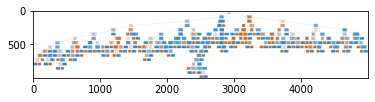

In [35]:
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

fn = 'bot_tree.png'

path = fn
img = image.load_img(path, target_size=(1000,5000))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)